<a href="https://colab.research.google.com/github/manuel-suarez/denoising-tests/blob/main/Convolutional_autoencoder_for_image_denoising_(flower).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [3]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url, fname='flower_photos', untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 1s 0us/step


In [4]:
batch_size = 32
img_height = 180
img_width = 180

In [5]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [6]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  color_mode="grayscale",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
def autoencoder_input(images, labels):
  x = tf.image.resize(normalization_layer(images),[img_height, img_width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  return x, x

In [12]:
norm_train_ds = train_ds.map(autoencoder_input)
norm_val_ds = val_ds.map(autoencoder_input)
image_batch, labels_batch = next(iter(norm_train_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [35]:
#noise_layer = tf.keras.layers.GaussianNoise(1)

In [36]:
#noise_train_ds = norm_train_ds.map(lambda x, y: (noise_layer(x), y))
#noise_val_ds = norm_val_ds.map(lambda x, y: (noise_layer(x), y))

In [13]:
input = layers.Input(shape=(img_height, img_width, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")

In [14]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_transpose (Conv2DTra  (None, 90, 90, 32)       9248  

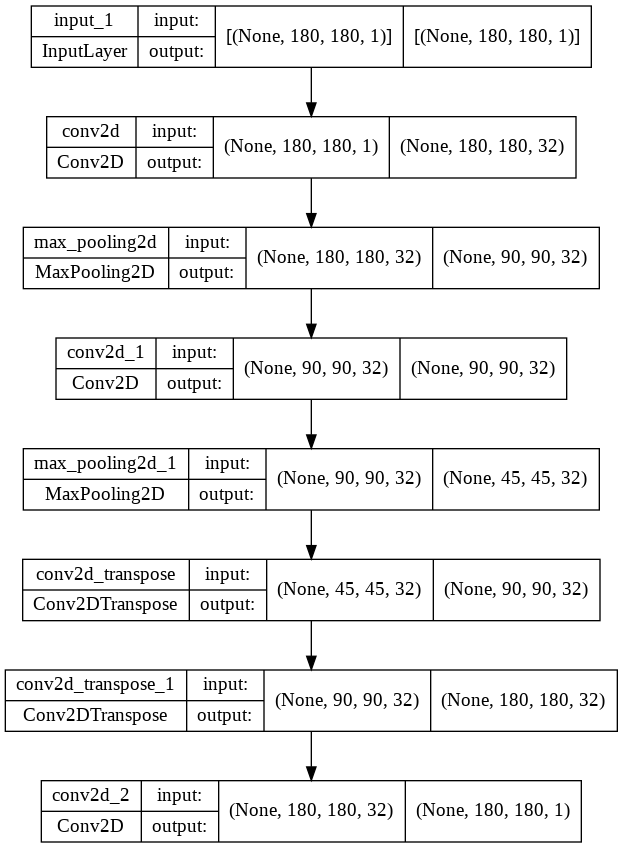

In [15]:
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [16]:
autoencoder.fit(
    x=norm_train_ds,
    epochs=50,
    batch_size=128,
    validation_data=(norm_val_ds),
    shuffle=True,
)

Epoch 1/50
92/92 [==============================] - 23s 106ms/step - loss: 0.5949 - val_loss: 0.5443
Epoch 2/50
92/92 [==============================] - 9s 97ms/step - loss: 0.5403 - val_loss: 0.5396
Epoch 3/50
92/92 [==============================] - 8s 82ms/step - loss: 0.5372 - val_loss: 0.5379
Epoch 4/50
92/92 [==============================] - 8s 83ms/step - loss: 0.5354 - val_loss: 0.5362
Epoch 5/50
92/92 [==============================] - 8s 83ms/step - loss: 0.5344 - val_loss: 0.5352
Epoch 6/50
92/92 [==============================] - 9s 92ms/step - loss: 0.5336 - val_loss: 0.5345
Epoch 7/50
92/92 [==============================] - 8s 82ms/step - loss: 0.5331 - val_loss: 0.5344
Epoch 8/50
92/92 [==============================] - 8s 83ms/step - loss: 0.5326 - val_loss: 0.5338
Epoch 9/50
92/92 [==============================] - 8s 83ms/step - loss: 0.5323 - val_loss: 0.5334
Epoch 10/50
92/92 [==============================] - 8s 84ms/step - loss: 0.5321 - val_loss: 0.5333
Epoch 1

In [5]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

NameError: ignored